# Capstone 2 Project - Team Selection   

<img src="https://github.com/sunilayyaps/datascience/blob/master/capstone-project2/ipl/images/ipl_teams.png?raw=true">

## Problem Statement   

<div class="span25 alert alert-info"> 
IPL franchises spend massive amounts of money is ensuring that they have the best batting and bowling options according to their game plan. An important problem is to select the playing XI from the available options. 
<br>
</div>

## Solution

<div class="span25 alert alert-info"> 

The present work focuses on Machine learning based data analytics to provide a good approach to solve this problem. A detailed performance ranking scheme is developed based on Random Forests Extra Tree Classifier to rank the players with respect to the other players in fray in IPL 11.  <br>
<br>
The ranking scheme provides percentile scores to the players for their batting and bowling performance and enables them to be compared against each other. The sum of the percentile scores for batting and bowling for the players in a given selection of Playing XI provide the fitness function for measuring the suitability of the team. 

</div>

In [1]:
#Declaring all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.stats.api as sms
from scipy import stats as st
import pandas.tseries
import warnings
warnings.filterwarnings('ignore')
#To scale our features as with linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
#import matplotlib.font_manager
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import sin, cos, sqrt, atan2
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from scipy.stats import probplot, shapiro
from statsmodels.graphics.regressionplots import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
sns.set()
%matplotlib inline

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be remo

numpy version: 1.14.1
pandas version: 0.20.3
scikit-learn version: 0.19.1


In [2]:
df_ipl = pd.read_excel('data/ipl_2018_players.xls',header=0)
df_ipl.head()

,team,player_id,player,role,price,prev-team,base-price,flag,rtm,foreign,...,balls,maiden,runs,wickets,bowl_avg,4wkt,best,economy,strike_rate,score
0,CSK,1,Faf du Plessis,Batsman,16000000,RPS,15000000,1,1,1,...,0.0,0,0,0,0.00,0,0,0.00,0.00,1
1,CSK,2,Harbhajan Singh,Bowler,20000000,MI,20000000,1,0,0,...,2919.0,5,3401,127,26.78,2,5/18,6.99,22.98,1
2,CSK,3,Dwayne Bravo,All-Rounder,64000000,GL,20000000,1,1,1,...,2017.0,1,2755,122,22.58,2,4/22,8.20,16.53,1
3,CSK,4,Shane Watson,All-Rounder,40000000,RCB,10000000,1,0,1,...,1837.0,3,2398,85,28.21,1,4/29,7.83,21.61,1
4,CSK,5,Kedar Jadhav,Batsman,78000000,DD,20000000,1,0,0,...,0.0,0,0,0,0.00,0,0,0.00,0.00,1


<div class="span25 alert alert-info"> 
This dataset contains all information of a player - the price in which they were bought, their batting and bowling averages, how many matches they have played and their role. 
</div>

In [3]:
for lab, row in df_ipl.iterrows() :
    df_ipl['price_increase'] = round(((df_ipl['price']-df_ipl['base-price'])/df_ipl['base-price'])*100,1)


In [4]:
#Creating individual DF for each teams
df_ipl_csk = df_ipl[df_ipl['team']=='CSK']
df_ipl_srh = df_ipl[df_ipl['team']=='SRH']
df_ipl_mi = df_ipl[df_ipl['team']=='MI']
df_ipl_rr = df_ipl[df_ipl['team']=='RR']
df_ipl_dd = df_ipl[df_ipl['team']=='DD']
df_ipl_kxip = df_ipl[df_ipl['team']=='KXIP']
df_ipl_rcb = df_ipl[df_ipl['team']=='RCB']
df_ipl_kkr = df_ipl[df_ipl['team']=='KKR']

<div class="span25 alert alert-info"> 
Deriving players for each team for exploratary analysis. 
</div>

In [5]:
df_ipl_csk_base = df_ipl_csk[df_ipl_csk['price']==df_ipl_csk['base-price']]
df_ipl_csk_base.head(5)

,team,player_id,player,role,price,prev-team,base-price,flag,rtm,foreign,...,maiden,runs,wickets,bowl_avg,4wkt,best,economy,strike_rate,score,price_increase
1,CSK,2,Harbhajan Singh,Bowler,20000000,MI,20000000,1,0,0,...,5,3401,127,26.78,2,5/18,6.99,22.98,1,0.0
6,CSK,7,Imran Tahir,Bowler,10000000,RPS,10000000,1,0,1,...,0,992,47,21.11,1,4/28,8.31,15.23,0,0.0
9,CSK,10,J Narayan,Wicket Keeper,2000000,NaN,2000000,1,0,0,...,0,0,0,0.00,0,0,0.00,0.00,0,0.0
10,CSK,11,Mitchell Santner,All-Rounder,5000000,NaN,5000000,1,0,1,...,0,591,28,21.10,1,4/11,7.10,17.80,0,0.0
13,CSK,14,Lungi Ngidi,Bowler,5000000,NaN,5000000,1,0,1,...,0,835,43,19.41,2,4/14,7.23,16.00,1,0.0


<div class="span25 alert alert-info"> 
Just a quick check on CSK players who were bought on the base price. 
</div>

In [6]:
df_ipl_price_sort = df_ipl.sort_values(by='price_increase',ascending=False)[:30]
writer = pd.ExcelWriter('df_ipl_top_per.xlsx')
df_ipl_price_sort.to_excel(writer,'Sheet1')
writer.save()

In [7]:
member = ((np.asarray(df_ipl_price_sort['player'])).reshape(6,5))
perchange = ((np.asarray(round(df_ipl_price_sort['price_increase'],0))).reshape(6,5))

<div class="span25 alert alert-info"> 
Sorting players as per the percentage increase from their base price to the price paid. 
</div>

In [8]:
df_ipl_sorted = pd.read_excel('data/df_ipl_top_per.xls',header=0)
result = df_ipl_sorted.pivot(index = 'Y',columns = 'X',values = 'price_increase')
print(result)

X       1       2       3      4      5
Y                                      
1  3000.0  1500.0  1166.7  850.0  700.0
2  2100.0  1450.0  1020.0  800.0  666.7
3  1900.0  1400.0  1000.0  800.0  620.0
4  1700.0  1400.0  1000.0  700.0  600.0
5  1600.0  1400.0   966.7  700.0  525.0
6  1600.0  1400.0   900.0  700.0  500.0


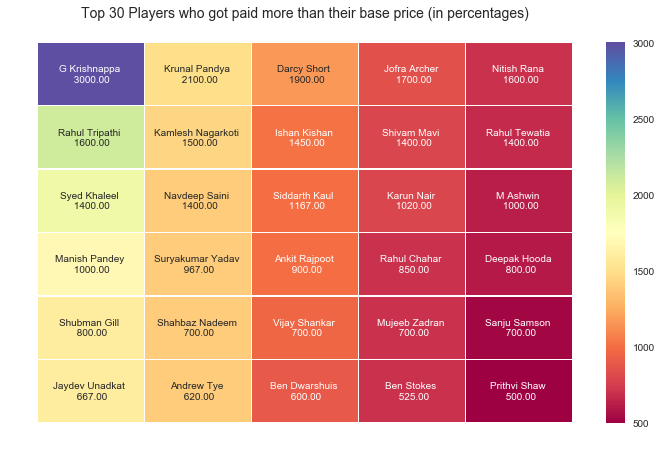

In [9]:
labels = (np.asarray(["{0} \n {1:.2f}".format(member,value)
                      for member,value in zip(member.flatten(),
                                            perchange.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(12,7))
title = 'Top 30 Players who got paid more than their base price (in percentages)'
plt.title(title,fontsize = 14)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='Spectral',linewidths=0.30,ax=ax)
plt.show()

In [10]:
df_ipl_foreign = df_ipl[df_ipl['country']!='IND']
df_ipl_indian = df_ipl[df_ipl['country']=='IND']
df_ipl_indian.loc[df_ipl_indian['price'].idxmax()]
df_ipl_foreign.loc[df_ipl_foreign['price'].idxmax()]

team                       RR
player_id                 125
player             Ben Stokes
role              All-Rounder
price               125000000
prev-team                 RPS
base-price           20000000
flag                        1
rtm                         0
foreign                     1
country                   ENG
retained                    0
innings                    11
not-out                     1
aggregrate                316
high-score               103*
average                  31.6
fifties                     1
hundreds                    1
ducks                       0
fours                      22
sixes                      15
balls_faced               221
scoring_rate           142.99
hard_hitter          0.167421
finisher            0.0909091
fast_scorer           1.42986
consistent               31.6
rbw                  0.624434
overs                      44
balls                     264
maiden                      1
runs                      316
wickets   

<div class="span25 alert alert-info"> 
Get a count of Indian players and Foreign national player in each team for exploratary analysis.
</div>

In [11]:
df_pivot = df_ipl.pivot_table('price',index='team',columns=['country'],aggfunc='count')
df_pivot_result = df_pivot.fillna(0)
df_pivot_result

country,AFG,AUS,BNG,ENG,IND,NP,NZ,SA,SL,WI
team,,,,,,,,,,
CSK,0.0,1.0,0.0,2.0,17.0,0.0,1.0,3.0,0.0,1.0
DD,0.0,2.0,0.0,1.0,17.0,1.0,2.0,2.0,0.0,0.0
KKR,0.0,3.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,3.0
KXIP,1.0,4.0,0.0,0.0,14.0,0.0,0.0,1.0,0.0,1.0
MI,0.0,2.0,1.0,0.0,17.0,0.0,0.0,2.0,1.0,2.0
RCB,0.0,1.0,0.0,2.0,16.0,0.0,3.0,2.0,0.0,0.0
RR,0.0,3.0,0.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0
SRH,2.0,2.0,1.0,1.0,17.0,0.0,1.0,0.0,0.0,1.0


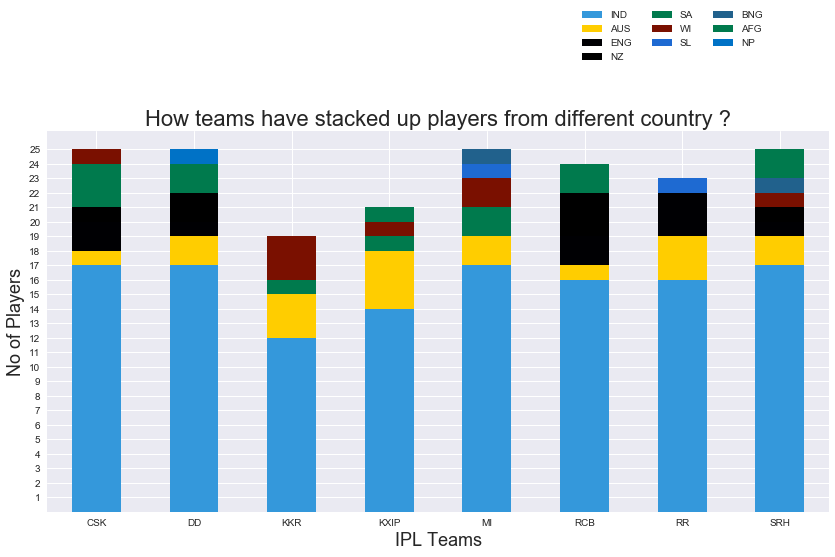

In [12]:
colors = ['#3498DB','#FFCD00','#000003','#000000','#007A4D','#7a1000','#1e6ad2','#21618C','#007A4D','#0072c6']

df_pivot_result.loc[:,['IND','AUS','ENG','NZ','SA', 'WI','SL','BNG','AFG', 'NP']].plot.bar(stacked=True, color=colors, figsize=(14,7))
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
tick_lab = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.title('How teams have stacked up players from different country ?',fontsize=22)
plt.xlabel('IPL Teams',fontsize=18)
plt.ylabel('No of Players',fontsize=18)
plt.legend(loc='center', bbox_to_anchor=(0.8, 1.25),
          ncol=3, fancybox=True, shadow=True)


<div class="span25 alert alert-info"> 
Since it is Indian Premier League it is obvious that you will see majority Indian players. Infact it is a mandatory rule that in you total team of 24-28, you can have only 8 foreign players which explains the graph above. In Foreign players, Australian players are more in each team. 
</div>

In [13]:
df_pivot_role = df_ipl.pivot_table('price',index='team',columns=['role'],aggfunc='count')
df_pivot_roles = df_pivot_role.fillna(0)
df_pivot_roles

role,All-Rounder,Batsman,Bowler,Wicket Keeper
team,,,,
CSK,8.0,6.0,9.0,2.0
DD,9.0,6.0,8.0,2.0
KKR,5.0,7.0,5.0,2.0
KXIP,5.0,9.0,7.0,0.0
MI,6.0,7.0,10.0,2.0
RCB,7.0,6.0,9.0,2.0
RR,10.0,4.0,7.0,2.0
SRH,7.0,7.0,9.0,2.0


<div class="span25 alert alert-info"> 
Exploring further on the composition of each team. <br>
1. A batsman is good at batting <br>
2. A bowler is specialized in bowling. <br>
3. An all-rounder does batting and bowling <br>
4. Wicket-keeper is a keeper who collects the ball behind the stumps. He is like a keeper in baseball who stands behind the pitcher. <br>
5. Wicket-keeper can be a good batsman also, but he cannot perform the role of a bowler.  <br>
</div>

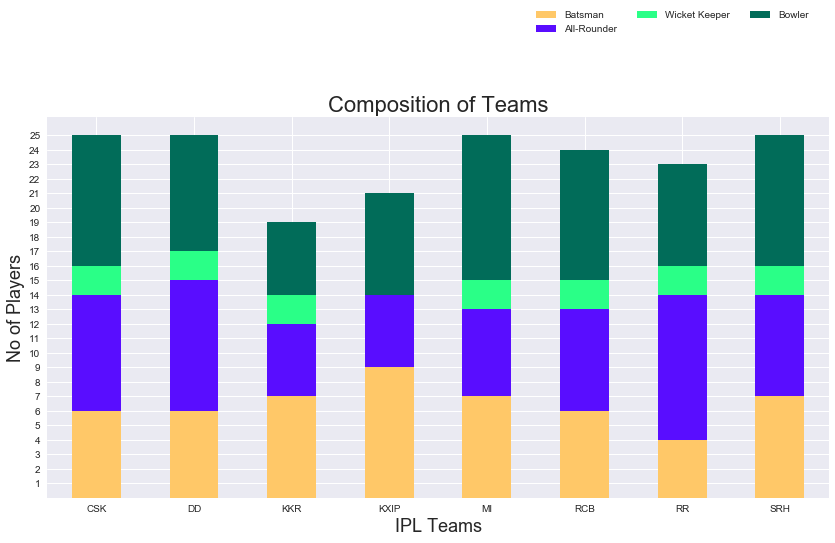

In [14]:
colors = ['#FFC868','#590DFF','#2AFF87','#016c59']
df_pivot_roles.loc[:,['Batsman','All-Rounder','Wicket Keeper','Bowler']].plot.bar(stacked=True, color=colors, figsize=(14,7))
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
tick_lab = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.title('Composition of Teams',fontsize=22)
plt.xlabel('IPL Teams',fontsize=18)
plt.ylabel('No of Players',fontsize=18)
plt.legend(loc='center', bbox_to_anchor=(0.8, 1.25),
          ncol=3, fancybox=True, shadow=True)

<div class="span25 alert alert-info"> 
Looking at the graph above, here are the observations <br> 

1. CSK, DD and RR are loaded up with lot of all-rounders. <br>
2. KKR who is historically a strong bowling team looks very weak in the bowling <br>
3. KXI doesn't have a specialized wicket keeper. I think K.L.Rahul who is a temporary keeper might do the job full time<br>
4. KKR only have 19 players. So if any of the players gets injured they don't have much to chose from.<br>
</div>

## Using Maching Learning to Select the Playing XI

In [15]:
df_ipl.shape

(187, 41)

In [16]:
#Create a dataframe for machine learning containing only id and other features
data_ipl_batsman = df_ipl[(df_ipl.flag==1)& (df_ipl.role=='Batsman') ]
data_ipl_bowler = df_ipl[(df_ipl.flag==1)& (df_ipl.role=='Bowler') ]
data_ipl_allrounder = df_ipl[(df_ipl.flag==1)& (df_ipl.role=='All-Rounder') ]
data_ipl_wicketkeeper = df_ipl[(df_ipl.flag==1)& (df_ipl.role=='Wicket Keeper') ]


<div class="span25 alert alert-warning"> 
Creating a dataframe to hold just players as per the role. This is needed as we are going to calculate the points as per the role. <br><br>

<b>A batsman will be scored as per the below parameters <br></b>
        - Hard Hitter =  (4*Fours + 6*Sixes) / Balls faced by player <br>
        - Finisher = Number of times not out/Total number of innings played <br>
        - FastScorer = Total runs scored/ Total balls faced<br>
        - Consistent = Total runs scored/ Total number of innings in which he got out<br>
        - Running between wickets = (Total runs scored - (4*Fours + 6*Sixes))/ Number of balls faced without boundary <br>
<b>A bowler will be scored as per the below parameters <br></b>
        - Economy= Total number of runs conceded / Total number of overs bowled <br>
        - WicketTaker= Total number of balls bowled / Total number of wickets taken <br>
        - Consistent = Total number of runs conceded / Total number of wickets taken <br>
<b>An allrounder will be calculated with both bowling and batting parameters<br></b>
<b>A wicket-keeper again will be calculated based on batting as each team does have only one or two keepers. So nothing more to select. <br></b>

</div>

In [17]:
print("Total number of batsman from all teams: ",len(data_ipl_batsman['player']))
print("Total number of bowler from all teams: ",len(data_ipl_bowler['player']))
print("Total number of All-rounder from all teams: ",len(data_ipl_allrounder['player']))

Total number of batsman from all teams:  47
Total number of bowler from all teams:  56
Total number of All-rounder from all teams:  49


In [18]:
#we are considering only 166 as rest of 21 players doesn't have much record. 
#We will now calculate weightage for our batsman. 
bt_features = ['hard_hitter','consistent','finisher','fast_scorer','rbw','innings']
bt_target = ['score']
X_bat = data_ipl_batsman[bt_features]
Y_bat = data_ipl_batsman[bt_target].values.ravel()

<div class="span25 alert alert-info"> 
Considering all the features needed for arrive on a score for batsman. I have added Innings also because there should be a weightage for the total number of Innings. Without this parameter a player like Pawan Deshpande  with only 11 matches became the top batsman of RCB which was correct. 
</div>

In [19]:
from sklearn.model_selection import train_test_split
X_bat_train, X_bat_test, Y_bat_train, Y_bat_test = train_test_split(X_bat, Y_bat, test_size=0.3, random_state=0)

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
# load data
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_bat_train,Y_bat_train)
y_train_bat_pred = model.predict(X_bat_train)
y_test_bat_pred = model.predict(X_bat_test)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
accuracy = accuracy_score(y_test_bat_pred, Y_bat_test)
print("The accuracy of this model is : ",accuracy)
print("The mean for this model is :", np.mean(y_test_bat_pred == Y_bat_test))

The accuracy of this model is :  0.7333333333333333
The mean for this model is : 0.7333333333333333


In [22]:
#print the feature importance from Random forest extra tree classifier
model = model.feature_importances_
print(model)

[0.10454263 0.24321192 0.12744401 0.13287209 0.17961605 0.21231331]


In [23]:
#Assign feature importance to a variable
columns=['hard_hitter','consistent','finisher','fast_scorer','rbw','innings']
a = np.array([model])
df_bat = pd.DataFrame(a,columns=columns)
print (df_bat['hard_hitter'].values[0])


0.10454262695288316


In [24]:
data_ipl_batsman.reset_index(drop=True, inplace=True)
data_ipl_batsman.head()

,team,player_id,player,role,price,prev-team,base-price,flag,rtm,foreign,...,maiden,runs,wickets,bowl_avg,4wkt,best,economy,strike_rate,score,price_increase
0,CSK,1,Faf du Plessis,Batsman,16000000,RPS,15000000,1,1,1,...,0,0,0,0.00,0,0,0.00,0.00,1,6.7
1,CSK,5,Kedar Jadhav,Batsman,78000000,DD,20000000,1,0,0,...,0,0,0,0.00,0,0,0.00,0.00,1,290.0
2,CSK,17,Murali Vijay,Batsman,20000000,KXIP,20000000,1,0,0,...,0,0,0,0.00,0,0,0.00,0.00,1,0.0
3,CSK,18,Sam Billings,Batsman,10000000,DD,10000000,1,0,1,...,0,0,0,0.00,0,0,0.00,0.00,0,0.0
4,DD,23,Glenn Maxwell,Batsman,90000000,KXIP,20000000,1,0,1,...,0,479,11,43.55,0,2/15,8.87,29.45,1,350.0


<div class="span25 alert alert-warning"> 
Weightage derived for each feature as per  RF Extra tree classifier. 
</div>

In [25]:
#Lets apply the weightage to our data to derive a score for each player
k = len(data_ipl_batsman)
data_ipl_batsman['player_score'] = 0
for I in range(0,k):
        v_hard_hit = data_ipl_batsman.loc[I,'hard_hitter'] * df_bat['hard_hitter'].values[0]
        v_consistent = data_ipl_batsman.loc[I,'consistent'] * df_bat['consistent'].values[0]
        v_finisher = data_ipl_batsman.loc[I,'finisher'] * df_bat['finisher'].values[0]
        v_fast_scorer = data_ipl_batsman.loc[I,'fast_scorer'] * df_bat['fast_scorer'].values[0]
        v_rbw = data_ipl_batsman.loc[I,'rbw'] * df_bat['rbw'].values[0]
        v_innings = data_ipl_batsman.loc[I,'innings'] * df_bat['innings'].values[0]
        data_ipl_batsman.loc[I,'player_score'] = v_hard_hit + v_consistent + v_finisher \
        + v_fast_scorer + v_rbw + v_innings

<div class="span25 alert alert-warning"> 
<b> Lets check couple of teams to see whether it derived correctly </b>
<div>

In [26]:
#checking RCB team top batsmen
rcb_batsmen = data_ipl_batsman[data_ipl_batsman.team == 'RCB']
top_rcb_batsman = rcb_batsmen.sort_values(['player_score'],ascending=[False])
top_rcb_batsman[['player','player_score']]

,player,player_score
43,Virat Kohli,39.481461
44,AB De Villiers,34.536360
28,Brendon McCullum,28.978201
30,Mandeep Singh,17.721672
29,Manan Vohra,14.965396
45,Sarfaraz Khan,10.156890


In [27]:
#checking CSK team top batsmen
csk_batsmen = data_ipl_batsman[data_ipl_batsman.team == 'CSK']
top_csk_batsman = csk_batsmen.sort_values(['player_score'],ascending=[False])
top_csk_batsman[['player','player_score']]

,player,player_score
39,SK Raina,41.962251
38,MS Dhoni,39.925213
2,Murali Vijay,27.937700
1,Kedar Jadhav,17.790262
0,Faf du Plessis,17.395963
3,Sam Billings,7.927082


<div class="span25 alert alert-info"> 
<b> Looking at the players above I can confirm that our RF-ET has derived the weightage correctly and has ranked the  top batsman perfectly. Lets do this for bowler and all-rounder and try to derive the playing 11. </b>
<div>

In [28]:
#Lets start adding weightage to bowlers features now
features_bowl = ['overs','bowl_avg','4wkt','economy','strike_rate']
target_bowl = ['score']
X_bowl = data_ipl_bowler[features_bowl]
Y_bowl = data_ipl_bowler[target_bowl].values.ravel()

In [29]:
from sklearn.model_selection import train_test_split
X_train_bowl, X_test_bowl, Y_train_bowl, Y_test_bowl = \
train_test_split(X_bowl, Y_bowl, test_size=0.3, random_state=0)

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
# load data
# feature extraction
model_bowl = ExtraTreesClassifier(n_estimators=100,class_weight = 'balanced_subsample',max_depth=10)
model_bowl.fit(X_train_bowl,Y_train_bowl)
y_train_pred_bowl = model_bowl.predict(X_train_bowl)
y_test_pred_bowl = model_bowl.predict(X_test_bowl)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
accuracy = accuracy_score(y_test_pred_bowl, Y_test_bowl)
print("The accuracy of this model is : ",accuracy)
print("The mean for this model is :", np.mean(y_test_pred_bowl == Y_test_bowl))

The accuracy of this model is :  0.7058823529411765
The mean for this model is : 0.7058823529411765


In [32]:
#print the feature importance from Random forest extra tree classifier
print(model_bowl.feature_importances_)

[0.23791953 0.18313727 0.13297677 0.21176186 0.23420457]


In [33]:
#Assign feature importance to a variable
model_bowl_f = model_bowl.feature_importances_
bowl_columns=['overs','bowl_avg','4wkt','economy','strike_rate']
a_bowl = np.array([model_bowl_f])
df_bowl = pd.DataFrame(a_bowl,columns=bowl_columns)
df_bowl

,overs,bowl_avg,4wkt,economy,strike_rate
0,0.23792,0.183137,0.132977,0.211762,0.234205


In [34]:
data_ipl_bowler.reset_index(drop=True, inplace=True)
data_ipl_bowler.head()

,team,player_id,player,role,price,prev-team,base-price,flag,rtm,foreign,...,maiden,runs,wickets,bowl_avg,4wkt,best,economy,strike_rate,score,price_increase
0,CSK,2,Harbhajan Singh,Bowler,20000000,MI,20000000,1,0,0,...,5,3401,127,26.78,2,5/18,6.99,22.98,1,0.0
1,CSK,7,Imran Tahir,Bowler,10000000,RPS,10000000,1,0,1,...,0,992,47,21.11,1,4/28,8.31,15.23,0,0.0
2,CSK,8,Karn Sharma,Bowler,50000000,MI,20000000,1,0,0,...,1,1323,49,27.00,2,4/16,7.68,21.10,0,150.0
3,CSK,9,Shardul Thakur,Bowler,22000000,RPS,7500000,1,0,0,...,0,353,12,29.42,0,3/19,8.57,20.58,1,193.3
4,CSK,12,Deepak Chahar,Bowler,8000000,RPS,2000000,1,0,0,...,0,115,1,115.00,0,1/35,9.58,72.00,0,300.0


In [35]:
#Assign feature importance to a variable
#Lets apply the weightage to our data to derive a score for each player
k = len(data_ipl_bowler)
data_ipl_bowler['player_score'] = 0
for I in range(0,k):
        v_overs = data_ipl_bowler.loc[I,'overs'] * df_bowl['overs'].values[0]
        v_bowl_avg = data_ipl_bowler.loc[I,'bowl_avg'] * df_bowl['bowl_avg'].values[0]
        v_4wkt = data_ipl_bowler.loc[I,'4wkt'] * df_bowl['4wkt'].values[0]
        v_economy = data_ipl_bowler.loc[I,'economy'] * df_bowl['economy'].values[0]
        v_strike_rate = data_ipl_bowler.loc[I,'strike_rate'] * df_bowl['strike_rate'].values[0]
        data_ipl_bowler.loc[I,'player_score'] = v_overs + v_bowl_avg + \
        v_4wkt + v_economy + v_rbw + v_strike_rate


<div class="span25 alert alert-info"> 
Again the weightage given by RF-ET looks reasonable. Total number of matches played, Strike Rate and Economy are of equal importance followed by bowling average and Big Wicket taking ability. It is not that often a player would take more than 4 wickets in a match so it is understandable that it is considered last. Let's apply this to the bowlers and apply both the scored to all-rounders.
</div>

In [36]:
#checking RCB team top batsmen
rcb_bowler = data_ipl_bowler[data_ipl_bowler.team == 'RCB']
top_rcb_bowler = rcb_bowler.sort_values(['player_score'],ascending=[False])
top_rcb_bowler[['player','player_score']]

,player,player_score
34,Umesh Yadav,88.421148
35,Yuzvendra Chahal,57.054428
40,Tim Southee,42.660526
39,N Coulter-Nile,31.414905
37,M Ashwin,20.645808
36,Aniket Choudhary,15.835668
38,Mohammed Siraj,14.766250


<div class="span25 alert alert-info"> 
Y.Chahal coming down in 2nd place is little surprising considering the form he is in currently. But based on his IPL records, what is suggested above looks good. May be if we add his latest T20 international matches then it will reflect a better story. But rest of the ranking looks good.
</div>

In [37]:
#checking CSK team top bowler
csk_bowler = data_ipl_bowler[data_ipl_bowler.team == 'CSK']
top_csk_bowler = csk_bowler.sort_values(['player_score'],ascending=[False])
top_csk_bowler[['player','player_score']]

,player,player_score
0,Harbhajan Singh,127.827017
2,Karn Sharma,52.842596
4,Deepak Chahar,42.901374
1,Imran Tahir,37.779835
6,Lungi Ngidi,36.625227
7,Mark Wood,31.759851
3,Shardul Thakur,21.895266
8,Monu Singh,21.726723
5,Asif K M,6.540054


<div class="span25 alert alert-danger"> 
<b>A point to note all the player scores are related to their role. You cannot compare a bowler player score with batsman player score or even all-rounder player score.</b>
</div>

In [38]:
data_ipl_allrounder.reset_index(drop=True, inplace=True)
data_ipl_allrounder.head()

,team,player_id,player,role,price,prev-team,base-price,flag,rtm,foreign,...,maiden,runs,wickets,bowl_avg,4wkt,best,economy,strike_rate,score,price_increase
0,CSK,3,Dwayne Bravo,All-Rounder,64000000,GL,20000000,1,1,1,...,1,2755,122,22.58,2,4/22,8.20,16.53,1,220.0
1,CSK,4,Shane Watson,All-Rounder,40000000,RCB,10000000,1,0,1,...,3,2398,85,28.21,1,4/29,7.83,21.61,1,300.0
2,CSK,11,Mitchell Santner,All-Rounder,5000000,NaN,5000000,1,0,1,...,0,591,28,21.10,1,4/11,7.10,17.80,0,0.0
3,CSK,15,Kanishk Seth,All-Rounder,2000000,NaN,2000000,1,0,0,...,0,323,18,17.94,0,3/23,7.02,15.30,0,0.0
4,CSK,16,Dhruv Shorey,All-Rounder,2000000,NaN,2000000,1,0,0,...,0,0,0,0.00,0,0,0.00,0.00,0,0.0


In [39]:
#Lets calculate all-rounder player score
#Assign feature importance to a variable
#Lets apply the weightage to our data to derive a score for each player
k = len(data_ipl_allrounder)
data_ipl_allrounder['player_score'] = 0
for I in range(0,k):
        #calculate bowling score
        v_overs = data_ipl_allrounder.loc[I,'overs'] * df_bowl['overs'].values[0]
        v_bowl_avg = data_ipl_allrounder.loc[I,'bowl_avg'] * df_bowl['bowl_avg'].values[0]
        v_4wkt = data_ipl_allrounder.loc[I,'4wkt'] * df_bowl['4wkt'].values[0]
        v_economy = data_ipl_allrounder.loc[I,'economy'] * df_bowl['economy'].values[0]
        v_strike_rate = data_ipl_allrounder.loc[I,'strike_rate'] * df_bowl['strike_rate'].values[0]
        v_bowling_score = v_overs + v_bowl_avg + v_4wkt + v_economy + v_rbw + v_strike_rate
        #calculate batting score
        v_hard_hit = data_ipl_allrounder.loc[I,'hard_hitter'] * df_bat['hard_hitter'].values[0]
        v_consistent = data_ipl_allrounder.loc[I,'consistent'] * df_bat['consistent'].values[0]
        v_finisher = data_ipl_allrounder.loc[I,'finisher'] * df_bat['finisher'].values[0]
        v_fast_scorer = data_ipl_allrounder.loc[I,'fast_scorer'] * df_bat['fast_scorer'].values[0]
        v_rbw = data_ipl_allrounder.loc[I,'rbw'] * df_bat['rbw'].values[0]
        v_innings = data_ipl_allrounder.loc[I,'innings'] * df_bat['innings'].values[0]
        v_batting_score = v_hard_hit + v_consistent + v_finisher + v_fast_scorer + v_rbw  + v_innings
        data_ipl_allrounder.loc[I,'player_score'] = v_batting_score + v_bowling_score

In [40]:
#checking CSK team top all-rounder
rcb_allrounder = data_ipl_allrounder[data_ipl_allrounder.team == 'CSK']
top_csk_allrounder = rcb_allrounder.sort_values(['player_score'],ascending=[False])
top_csk_allrounder[['player','player_score']]

,player,player_score
43,R Jadeja,119.036032
0,Dwayne Bravo,113.598246
1,Shane Watson,113.524665
2,Mitchell Santner,37.448284
3,Kanishk Seth,25.328987
5,Kshitiz Sharma,21.105692
6,Chaitanya Bishnoi,18.843418
4,Dhruv Shorey,11.090650


### Wicket Keepers

In [41]:
data_ipl_wicketkeeper.reset_index(drop=True, inplace=True)
data_ipl_wicketkeeper.head()

,team,player_id,player,role,price,prev-team,base-price,flag,rtm,foreign,...,maiden,runs,wickets,bowl_avg,4wkt,best,economy,strike_rate,score,price_increase
0,CSK,6,Ambati Rayudu,Wicket Keeper,22000000,MI,5000000,1,0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,340.0
1,CSK,10,J Narayan,Wicket Keeper,2000000,NaN,2000000,1,0,0,...,0,0,0,0.0,0,0,0.0,0.0,0,0.0
2,DD,43,Naman Ojha,Wicket Keeper,14000000,SRH,7500000,1,0,0,...,0,0,0,0.0,0,0,0.0,0.0,1,86.7
3,KKR,47,Dinesh Karthik,Wicket Keeper,74000000,GL,20000000,1,0,0,...,0,0,0,0.0,0,0,0.0,0.0,1,270.0
4,KKR,48,Robin Uthappa,Wicket Keeper,64000000,KKR,20000000,1,1,0,...,0,0,0,0.0,0,0,0.0,0.0,1,220.0


In [42]:
#Lets apply the weightage to our data to derive a score for each player
k = len(data_ipl_wicketkeeper)
data_ipl_wicketkeeper['player_score'] = 0
for I in range(0,k):
        v_hard_hit = data_ipl_wicketkeeper.loc[I,'hard_hitter'] * df_bat['hard_hitter'].values[0]
        v_consistent = data_ipl_wicketkeeper.loc[I,'consistent'] * df_bat['consistent'].values[0]
        v_finisher = data_ipl_wicketkeeper.loc[I,'finisher'] * df_bat['finisher'].values[0]
        v_fast_scorer = data_ipl_wicketkeeper.loc[I,'fast_scorer'] * df_bat['fast_scorer'].values[0]
        v_rbw = data_ipl_wicketkeeper.loc[I,'rbw'] * df_bat['rbw'].values[0]
        v_innings = data_ipl_wicketkeeper.loc[I,'innings'] * df_bat['innings'].values[0]
        data_ipl_wicketkeeper.loc[I,'player_score'] = v_hard_hit + v_consistent + \
        v_finisher + v_fast_scorer + v_rbw + v_innings
data_ipl_wicketkeeper[['player','team','player_score']]

,player,team,player_score
0,Ambati Rayudu,CSK,29.629585
1,J Narayan,CSK,10.605468
2,Naman Ojha,DD,24.734711
3,Dinesh Karthik,KKR,35.005194
4,Robin Uthappa,KKR,37.843008
5,Ishan Kishan,MI,8.624858
6,Aditya Tare,MI,9.657219
7,Quinton de Kock,RCB,12.863290
8,Parthiv Patel,RCB,30.386519
9,Sanju Samson,RR,19.649412


<div class="span25 alert alert-info"> 
<b>For some of the teams wicketkeeper are easy choice. For example CSK obviously will got for MS Dhoni who ia also the captain of the side. Rishabh Pant from DD, W.Saha from SRH, Dinesh Karthik from DD are automatic choices.</b>
</div>

### Merging all dataframe to one final dataframe.

In [43]:
#lets concat all the dataframe and frame a final df
all_dfs = [data_ipl_allrounder, data_ipl_batsman, data_ipl_bowler,data_ipl_wicketkeeper]
df_final_teams = pd.concat(all_dfs)
df_final_teams.reset_index(drop=True, inplace=True)
desred_decimals = 2    
df_final_teams['player_score'] = df_final_teams['player_score'].apply(lambda x: round(x,desred_decimals))

### A look at the CSK team as per their role & score

In [44]:
df_csk = df_final_teams[df_final_teams["team"]=="CSK"]
df_csk_final = df_csk.sort_values(['role','player_score'],ascending=False)
print(df_csk_final[['player','role','player_score']])

                player           role  player_score
152      Ambati Rayudu  Wicket Keeper         29.63
153          J Narayan  Wicket Keeper         10.61
96     Harbhajan Singh         Bowler        127.83
98         Karn Sharma         Bowler         52.84
100      Deepak Chahar         Bowler         42.90
97         Imran Tahir         Bowler         37.78
102        Lungi Ngidi         Bowler         36.63
103          Mark Wood         Bowler         31.76
99      Shardul Thakur         Bowler         21.90
104         Monu Singh         Bowler         21.73
101           Asif K M         Bowler          6.54
88            SK Raina        Batsman         41.96
87            MS Dhoni        Batsman         39.93
51        Murali Vijay        Batsman         27.94
50        Kedar Jadhav        Batsman         17.79
49      Faf du Plessis        Batsman         17.40
52        Sam Billings        Batsman          7.93
43            R Jadeja    All-Rounder        119.04
0         Dw

In [45]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('ipl_team_analysis.xls', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
df_final_teams.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()


### Starting XI for all IPL Teams using Machine Learning

<div class="span25 alert alert-info"> 
<b>- Orange color indicates foreign player</b><br>
<b>- Don't compare scores of All-Rounder with Bowlers and Batsman.</b><br>
<b>- Each role has its own scoring range. All-rounder with 102 score might not be bigger than batsman with 38.54</b><br>
</div>

### Chennai Super Kings (CSK)

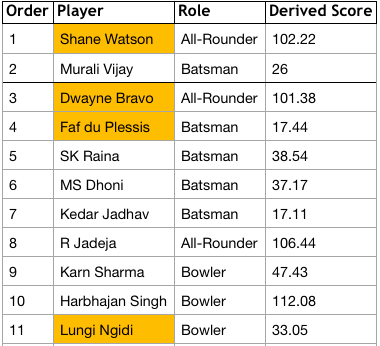

In [46]:
# Display the resulting decision tree
from IPython.display import Image
Image(filename=('images/csk_team.png'))


### Delhi Daredevils (DD)

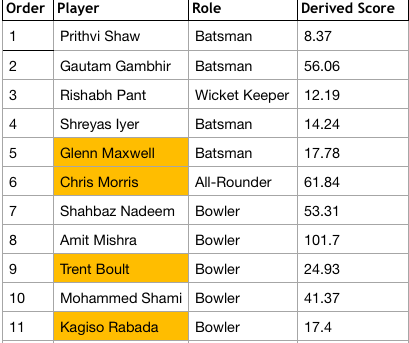

In [47]:
Image(filename=('images/dd_team.png'))

### Kolkata Knight Riders

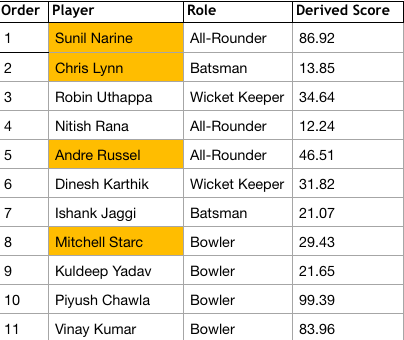

In [48]:
Image(filename=('images/kkr_team.png'))

### Mumbai Indians

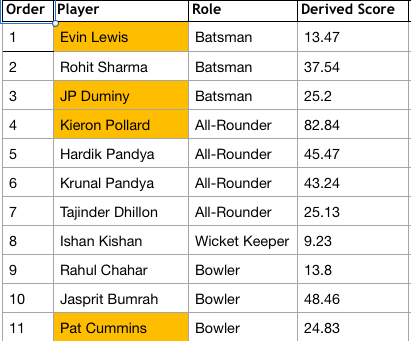

In [49]:
Image(filename=('images/mi-team.png'))

### Kings XI Punjab

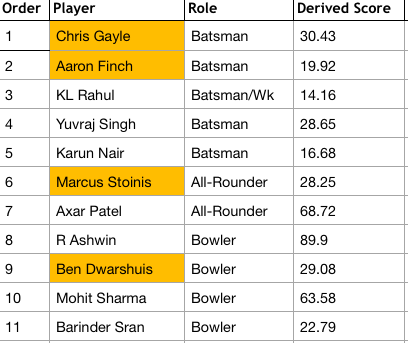

In [50]:
Image(filename=('images/kxi-team.png'))

### Sunrisers Hyderabad [SRH]

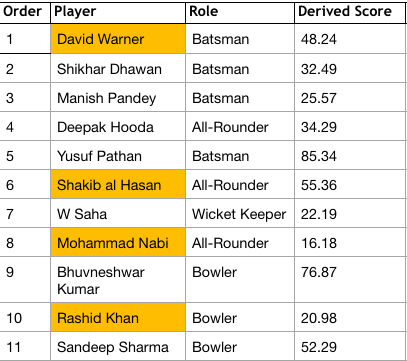

In [51]:
Image(filename=('images/srh-team.png'))

### Royals Challengers Bangalore (RCB)

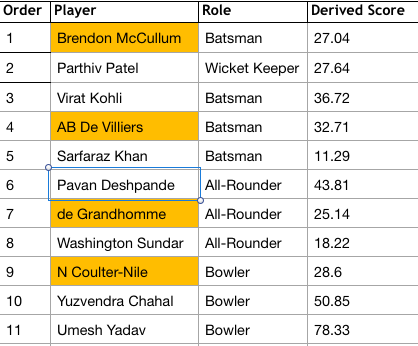

In [52]:
Image(filename=('images/rcb-team.png'))

### Rajasthan Royals

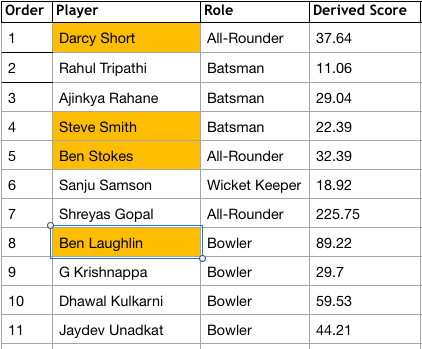

In [53]:
Image(filename=('images/rr-team.png'))

## Conclusion

<div class="span25 alert alert-info">
So I was able to generate all IPL teams from Machine Learning and looking at overall team and the restriction of 4 foreign players per team, 70% of the each team matches with everyone's expectation. The rest of the 30% is where ML has helped out in picking the right players as they would have been under the cloud. For example, Pavan Deshpande for RCB, Shreyas Gopal for RR, Ben Dwarshuis for Kings XI and Lungi Ngidi for CSK wouldn't been the obvious choice for the team selection committee unless backed by numbers. Shreyas Gopal and Pawan Deshpande are unknown players to the IPL audience and I would be fascinated to see whether these players will really make it to the playing eleven when the season starts on April 7th. 

<br><br>

As far as I am concerned, since I am fanatic of cricket I will continue to collect, explore and learn more about the game through data. Some of the players doesn't have not enough records. I feel that addition of more data from Big Bash League, International T20, PSL, Carribean League, our model will get better.   

</div>